In [1]:
suppressMessages(suppressWarnings(library(VennDiagram)))
suppressMessages(suppressWarnings(library(vcd)))
suppressMessages(suppressWarnings(library(plyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(ggbeeswarm)))
suppressMessages(suppressWarnings(library(vcdExtra)))
suppressMessages(suppressWarnings(library(dplyr)))
source("../lib/pcaFunctions.R")

# figure 1a
summary of the microsatellites considered in our previous study and the recent study of eSTRs. Overlapping microsatellites consideren in both studies are summarized in the overlapData.txt file.

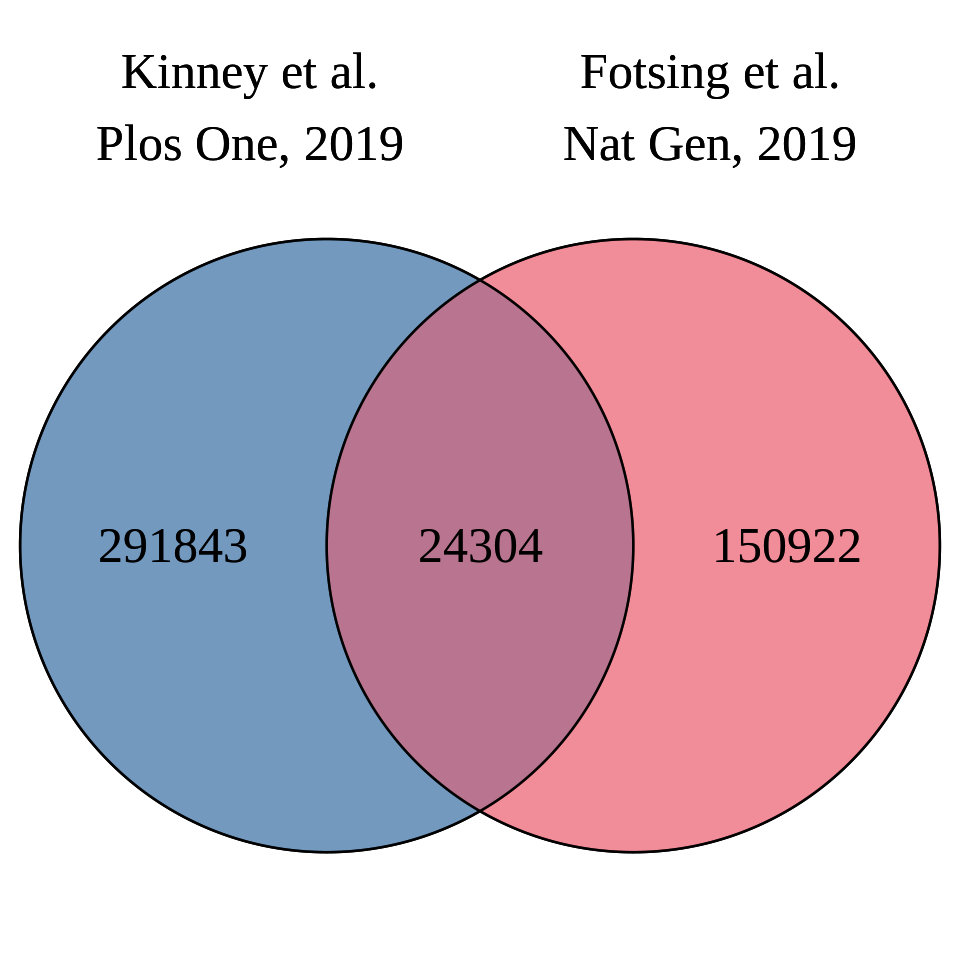

In [2]:
overlap <- read.table("../data/S1_Dataset.txt",header=TRUE)
options(repr.plot.width=8, repr.plot.height=8)
venn.plot <- draw.pairwise.venn(316147, 175226, length(unique(overlap$microID)), 
             c("Kinney et al.\nPlos One, 2019", "Fotsing et al.\nNat Gen, 2019"), 
             cat.dist = 0.09, scaled = FALSE,fill = c("#4477aa", "#ee6677"),
             cex = 2.5,cat.cex = 2.5,cat.pos = c(-10, 10))
grid.draw(venn.plot)

# figure 1b
Contingeny table for microsatellites tabulated by EBML and/or eSTR. Note that the colorscheme in the published version is constomized.


	Fisher's Exact Test for Count Data

data:  matrix(contingency, ncol = 2)
p-value = 4.701e-12
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.422226 1.867280
sample estimates:
odds ratio 
  1.631229 


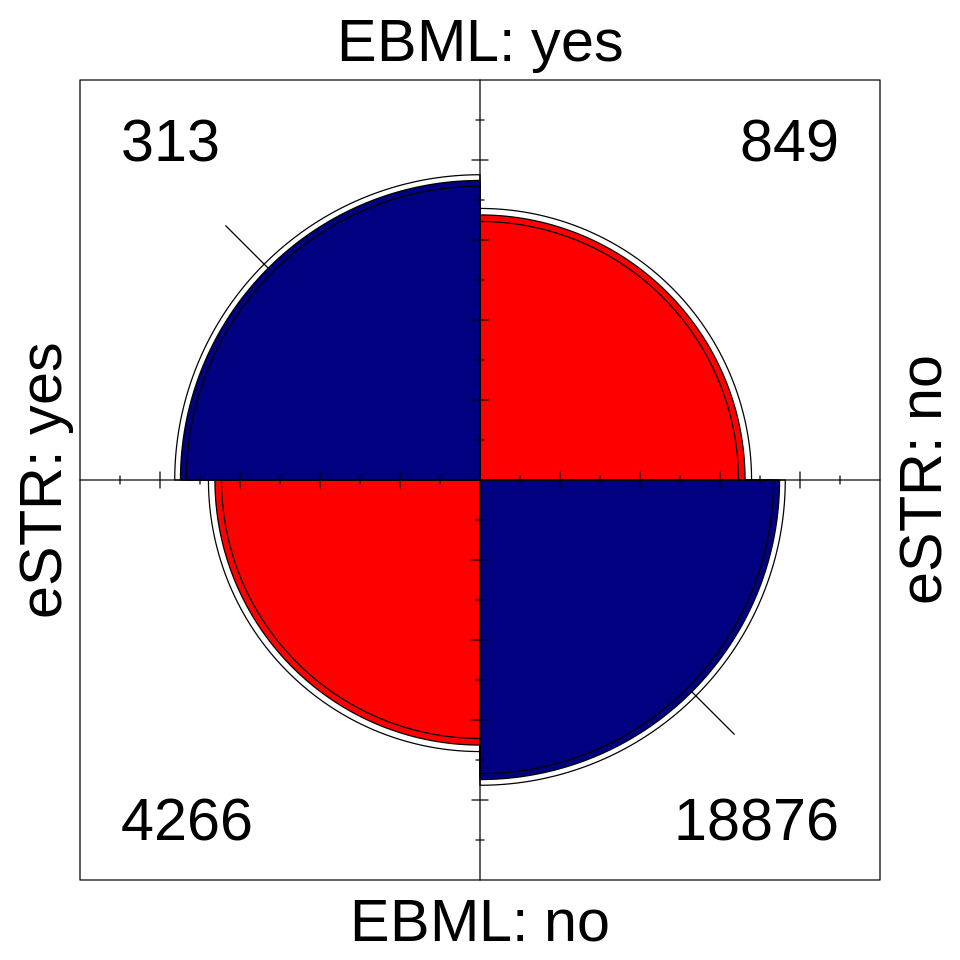

In [3]:
tL <- length(unique(overlap[which(overlap$EBML=="YES" & overlap$eSTR=="YES"),c("microID")]))
bL <- length(unique(overlap[which(overlap$EBML=="NO" & overlap$eSTR=="YES"),c("microID")]))
tR <- length(unique(overlap[which(overlap$EBML=="YES" & overlap$eSTR=="NO"),c("microID")]))
bR <- length(unique(overlap[which(overlap$EBML=="NO" & overlap$eSTR=="NO"),c("microID")]))
contingency <- c(tL,bL,tR,bR)
fisher.test(matrix(contingency,ncol=2))
fourway <- array(contingency, c(2, 2, 1),
       dimnames = list("EBML"=c("yes","no"),
       eSTR=c("yes","no")))
fourfold(fourway,mfrow=c(1,1), conf_level=.99, fontsize = 16)

# figure 1c
Here we look at the effect size for EBML/eSTRs vs all other eSTRs. Effect sizes in the figure1cData.txt file are taken from the publication by Fotsing et al. Overlapping EBML/eSTRs have slightly larger effect sizes. 


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.046194, p-value = 0.04109
alternative hypothesis: two-sided


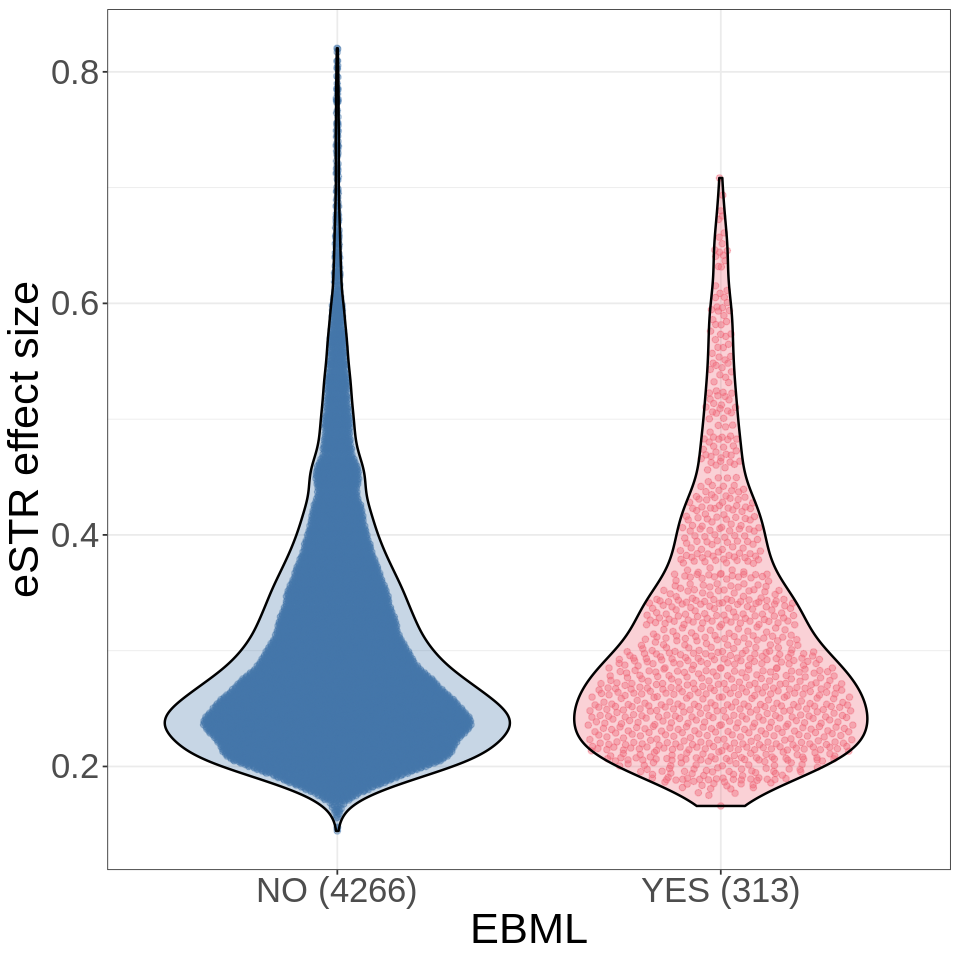

In [4]:
df <- read.table("../data/S2_Dataset.txt",header=TRUE,sep="\t")
x <- df[which(df$EBML=="NO"),c("response")]
y <- df[which(df$EBML=="YES"),c("response")]
ks.test(x,y)
effect<-ggplot(df, aes(x=EBML, y=response, fill=EBML, color=EBML))
effect <- effect + geom_quasirandom(data = df, alpha = 0.4, width=.35,show.legend = FALSE)
effect <- effect + geom_violin(show.legend = FALSE,size=.7,color="black",alpha=.3)
effect <- effect + theme_bw()
effect <- effect + scale_fill_manual(values=c("#4477aa","#ee6677"))
effect <- effect + scale_color_manual(values=c("#4477aa","#ee6677"))
effect <- effect + ylab("eSTR effect size")
effect <- effect + xlab("EBML")
effect <- effect + scale_x_discrete(labels=c("NO (4266)","YES (313)"))
effect <- effect + theme(text = element_text(size = 26))
print(effect)

# figure 1d
The figure1dData.txt file summarizes overlapping EBML/eSTRs by ethnicity and tissue type. Tissue types were taken from the supplementary material of the Fotsing paper; ethnicities were taken from the supplementary material of our 2019 paper.

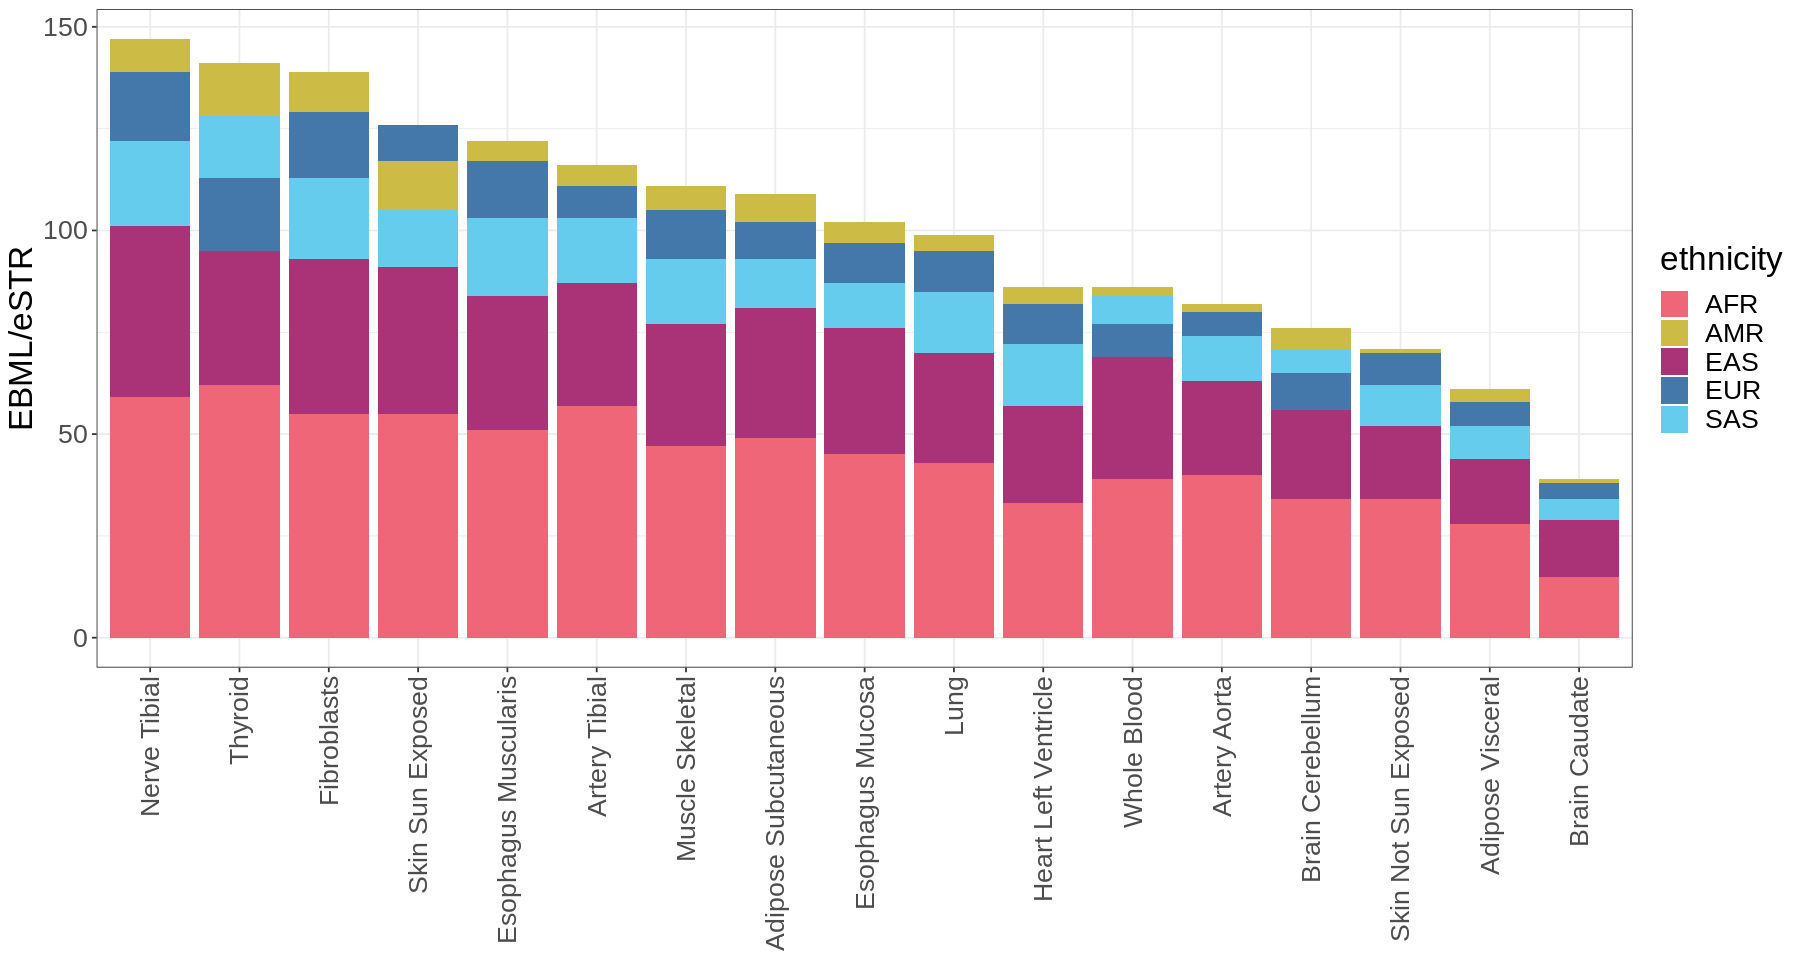

In [5]:
options(repr.plot.width=15, repr.plot.height=8)
eth <- read.table("../data/S3_Dataset.txt",header = TRUE,sep="\t")
counts <- ddply(eth, .(eth$ethnicity, eth$tissue),nrow)
names(counts) <- c("ethnicity","tissue","microID")
cp <- ggplot(counts[order(counts$tissue,decreasing=T),], aes(x=reorder(tissue,-microID,sum),group=microID, y=microID)) 
cp <- cp + geom_bar(aes(fill = ethnicity),stat = "identity") 
cp <- cp + theme_bw() 
cp <- cp + theme(text = element_text(size = 20)) 
cp <- cp + theme(axis.text.x=element_text(angle=90,vjust=.5,hjust=1.0),axis.title.x=element_blank()) 
cp <- cp + ylab("EBML/eSTR") 
cp <- cp + scale_fill_manual(values=c('#ee6677','#ccbb44','#aa3377','#4477aa','#66ccee'))
print(cp)